In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
regs = [
    "LinearSVR",
    "ElasticNet"
]

metrics = [
    "Mean Squared Error",
    "Mean Absolute Error"
]

pcnts = np.arange(10, 110, 10)

rng = np.random.default_rng(100)

In [18]:
MSE_train = np.array([1, 1.5, 2, 2.3, 2.4, 2.4, 2.5, 2.7, 2.8, 2.8])
MSE_test = np.array([8.5, 8, 7, 5.5, 4.5, 4, 3.8, 3.8, 3.7, 3.5])
MAE_train = (MSE_train / 2) + rng.normal(0, 0.1, size=10)
MAE_test = (MSE_test / 2) + rng.normal(0, 0.05, size=10)
mstr2 = MSE_train * (MSE_train / 2)
mste2 = MSE_test * (MSE_test / 2)
matr2 = MAE_train * (MAE_train / 2)
mate2 = MAE_test * (MAE_test / 2)
vars = [MSE_train, MSE_test, MAE_train, MAE_test, mstr2, mste2, matr2, mate2]



In [19]:
df_prep = {}
for i, reg in enumerate(regs):
    for j, metric in enumerate(metrics):
        print(f"Train idx: {i * 4 + j * 2 + 0}")
        print(f"Test idx: {i * 4 + j * 2 + 1}")
        df_prep[f"{reg}-{metric}-train"] = vars[i * 4 + j * 2 + 0]
        df_prep[f"{reg}-{metric}-test"] = vars[i * 4 + j * 2 + 1]

Train idx: 0
Test idx: 1
Train idx: 2
Test idx: 3
Train idx: 4
Test idx: 5
Train idx: 6
Test idx: 7


In [24]:
df = pd.DataFrame.from_dict(df_prep)
df.index = pcnts
df.to_csv("sample_out.csv")

<Axes: xlabel='PCT Training Data Used %', ylabel='MSE'>

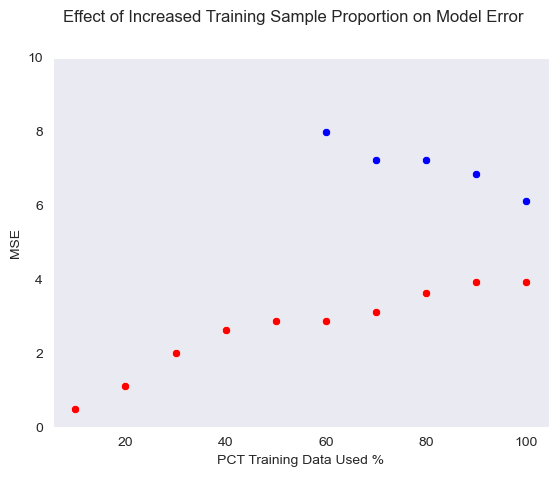

In [14]:
sns.set_style("dark")
fig, ax = plt.subplots()
ax.set_ylabel("MSE")
ax.set_xlabel("PCT Training Data Used %")
ax.set_ylim(0, 10)
fig.suptitle("Effect of Increased Training Sample Proportion on Model Error")
sns.scatterplot(x = pcnts, y = mstr2, color="red")
sns.scatterplot(x = pcnts, y = mste2, color="blue")